<a href="https://colab.research.google.com/github/Numb4r/Tanque/blob/master/Tanque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
! pip install scikit-fuzzy >> /dev/null
%cd /content/drive/MyDrive/Colab\ Notebooks/
!jupyter nbconvert Tanque.ipynb --to latex >> /dev/null

/content/drive/MyDrive/Colab Notebooks
[NbConvertApp] Converting notebook Tanque.ipynb to latex
[NbConvertApp] Support files will be in Tanque_files/
[NbConvertApp] Making directory Tanque_files
[NbConvertApp] Making directory Tanque_files
[NbConvertApp] Making directory Tanque_files
[NbConvertApp] Making directory Tanque_files
[NbConvertApp] Writing 112333 bytes to Tanque.tex


# Controle Fuzzy para um tanque de água 
 
O objetivo deste trabalho é o desenvolvimento de um controlador fuzzy para um sistema de tanque de água. Precisamos controlar a válvula de saída, utilizando o erro entre o limiar e o nível atual da água. 
 
A entrada do sistema fuzzy será o erro, que é definida como $e= n-l$, onde $n$ é a altura do nível da água e $l$ e a altura do limiar definidos em centímetros. A saída do sistema fuzzy será $-7 \leqslant \omega \leqslant 7$, onde $ω$ e a variação empregada na valvula de saida. O método de defuzzificação escolhido será o centróide.
 
Para o nosso problema, definimos o limiar como 50. A entrada de água no tanque será de 0 $\leqslant q\leqslant 15 l/s$, contínua e definida de forma aleatória com uma variação de $-1 \leqslant \lambda \leqslant 1$ entre cada entrada. 




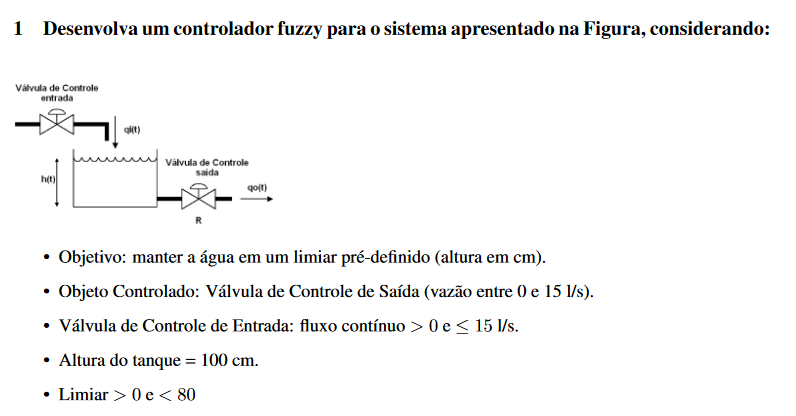

# Bibliotecas 

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import math
import skfuzzy as fuzz
import random

# Sistema Fuzzy
Possuímos 3 regras antecedentes com 3 regras consequentes, utilizando uma função gaussiana como função de ativação.
 
As regras de pertinência são:
 
- Se x $\in$ A1 $\rightarrow$ y $\in$ B1
- Se x $\in$ A2 $\rightarrow$ y $\in$ B2
- Se x $\in$ A3 $\rightarrow$ y $\in$ B3

In [160]:
def gaussian(x,arr):
    k = arr[0]
    m  = arr[1]
    k = k/2
    expoent = (-1)*((x-m)**2)/(k**2)
    return np.exp( expoent )
def ativacoes(x,ant):
  W = []
  for i in ant:
    row = []
    for j in x:
      row.append(gaussian(j,i))
    W.append(row)
  return W

def plotGraphic(x,matrix,legend,xlabel,ylabel,ylim=[0,1]):
  plt.figure(3, figsize = ((20, 5)))
  plt.ylim(ylim[0],ylim[1])
  plt.xlim(x[0], x[-1])
  for i in range(len(matrix)):
    plt.plot(x,matrix[i], label=legend+str(i))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()
class Tanque:
  def __init__(self,ant_param,cons_param):
    self.x = np.linspace(-100,100,1000)
    self.y= np.linspace(-7,7,100)
    self.ant_param=ant_param
    self.cons_param = cons_param
    self.wAntecedente = ativacoes(self.x,self.ant_param)
    self.wConsequente = ativacoes(self.y,self.cons_param)
  def fuzzy(self,erro):
    w = []
    # Calculo w
    for i in self.ant_param:
      w.append(gaussian(erro,i))
    C = [[],[],[],[],[]]
    # Agregacao
    agreg_out = []
    for i in range(len(self.wConsequente[0])):
      C[0].append(min(w[0],self.wConsequente[0][i]))
      C[1].append(min(w[1],self.wConsequente[1][i]))
      C[2].append(min(w[2],self.wConsequente[2][i]))
      agreg_out.append(max(C[0][i],C[1][0],C[2][i]  ))
    return   fuzz.defuzz(self.y, np.array(agreg_out), 'centroid')
   
    


# Declaração do sistema

In [161]:
t = Tanque([[50,-50],[10,0],[50,50]],
           [[2,-6],[2,0],[2,6]]
           )

# Funções antecedentes

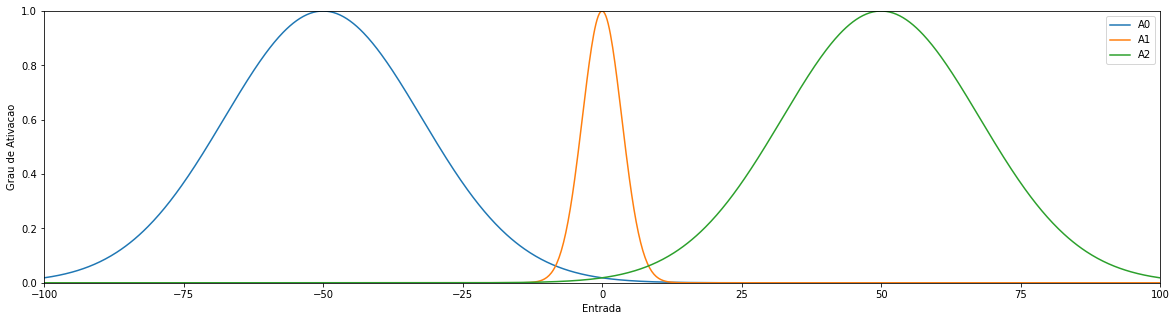

In [162]:
plotGraphic(t.x,t.wAntecedente,"A","Entrada","Grau de Ativacao")

# Funções consequentes

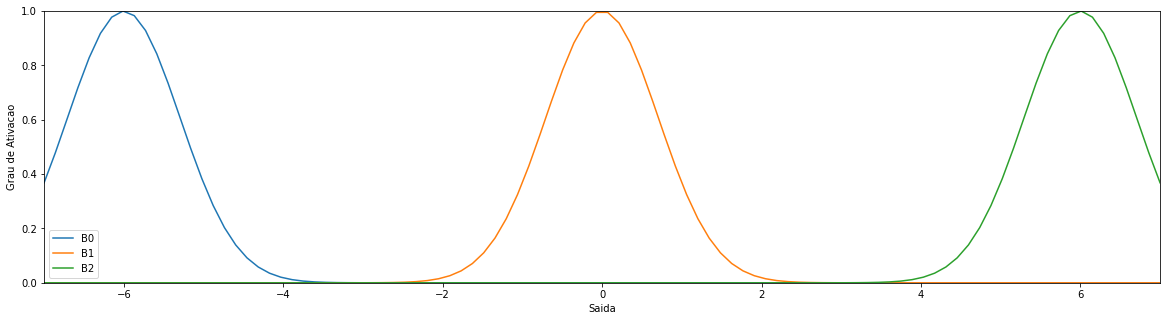

In [163]:
plotGraphic(t.y,t.wConsequente,"B","Saida","Grau de Ativacao")

# Comportamento da saída de acordo com o erro

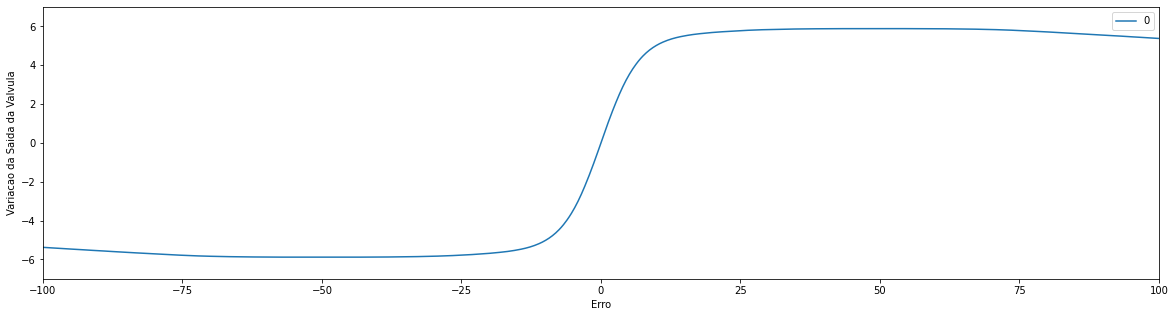

In [164]:
arr = []
C = np.linspace(-100,100,1000)
for i in C:
    arr.append(t.fuzzy(i))
plotGraphic(C,[arr],"","Erro","Variacao da Saida da Valvula",[-7,7])

# Simulação do um sistema

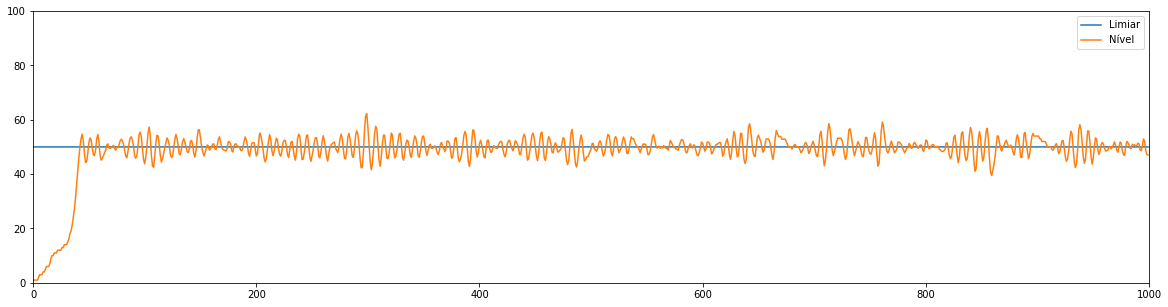

In [169]:
limiar = 50
nivelDaAgua = 0
erro = nivelDaAgua-limiar
escoamento = 0
entrada=[]
x =[]
negativeBound = 0
positiveBound= 1
for i in range(1000):
  entrada.append(random.randint(negativeBound,positiveBound))
  negativeBound = entrada[-1] - 1 if entrada[-1] - 1 > 0 else 0
  positiveBound = entrada[-1] + 1 if entrada[-1] + 1 < 15 else 15
  x.append(i)
nivel =[]
arrEscoamento = []
arrlimiar=[]
for i in entrada:
  arrlimiar.append(limiar)
  escoamento += t.fuzzy(erro)
  arrEscoamento.append(t.fuzzy(erro))
  if escoamento > 15:
    escoamento = 15
  if escoamento < 0:
    escoamento = 0
  nivelDaAgua+=(i-escoamento)
  erro = nivelDaAgua-limiar
  if(nivelDaAgua > 100):
    nivelDaAgua = 100
  elif (nivelDaAgua < 0):
    nivelDaAgua = 0
  nivel.append(nivelDaAgua)
plt.figure(3, figsize = ((20, 5)))
plt.ylim(0,100)
plt.xlim(0, 1000)
plt.step(x,arrlimiar,label="Limiar")
plt.plot(x,nivel,label="Nível")
plt.legend()
plt.show()